In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path

In [2]:
#Read path with Pandas
BeaufortSea_Temp_data = pd.read_csv('Beaufort_Sea_Temperatures.csv')
BeaufortSea_Temp_data.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,347155200,1981-01-01 00:00:00 +0000 UTC,-36000,Beaufort Sea,72.843141,-145.568484,-25.67,NaN,-30.30,-38.27,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
1,347158800,1981-01-01 01:00:00 +0000 UTC,-36000,Beaufort Sea,72.843141,-145.568484,-25.40,NaN,-30.03,-38.00,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
2,347162400,1981-01-01 02:00:00 +0000 UTC,-36000,Beaufort Sea,72.843141,-145.568484,-24.84,NaN,-29.49,-37.44,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
3,347166000,1981-01-01 03:00:00 +0000 UTC,-36000,Beaufort Sea,72.843141,-145.568484,-24.00,NaN,-28.66,-36.60,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
4,347169600,1981-01-01 04:00:00 +0000 UTC,-36000,Beaufort Sea,72.843141,-145.568484,-23.03,NaN,-27.47,-35.63,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n


In [3]:
BeaufortSea_Temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324336 entries, 0 to 324335
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt                   324336 non-null  int64  
 1   dt_iso               324336 non-null  object 
 2   timezone             324336 non-null  int64  
 3   city_name            324336 non-null  object 
 4   lat                  324336 non-null  float64
 5   lon                  324336 non-null  float64
 6   temp                 324336 non-null  float64
 7   visibility           0 non-null       float64
 8   dew_point            324336 non-null  float64
 9   feels_like           324336 non-null  float64
 10  temp_min             324336 non-null  float64
 11  temp_max             324336 non-null  float64
 12  pressure             324336 non-null  int64  
 13  sea_level            0 non-null       float64
 14  grnd_level           0 non-null       float64
 15  humidity         

In [4]:
# clean data to include columns dt, dt_iso, city name. lat, lon, temp, temp_min, temp_max, presure
cleaned_BeaufortSea_Temp_data = BeaufortSea_Temp_data[['dt','dt_iso', 'city_name', 'lat', 'lon', 'temp','temp_min', 'temp_max', 'pressure']]
cleaned_BeaufortSea_Temp_data

,dt,dt_iso,city_name,lat,lon,temp,temp_min,temp_max,pressure
0,347155200,1981-01-01 00:00:00 +0000 UTC,Beaufort Sea,72.843141,-145.568484,-25.67,-25.82,-25.51,1033
1,347158800,1981-01-01 01:00:00 +0000 UTC,Beaufort Sea,72.843141,-145.568484,-25.40,-25.49,-25.31,1032
2,347162400,1981-01-01 02:00:00 +0000 UTC,Beaufort Sea,72.843141,-145.568484,-24.84,-25.02,-24.66,1032
3,347166000,1981-01-01 03:00:00 +0000 UTC,Beaufort Sea,72.843141,-145.568484,-24.00,-24.30,-23.71,1030
4,347169600,1981-01-01 04:00:00 +0000 UTC,Beaufort Sea,72.843141,-145.568484,-23.03,-23.40,-22.65,1029
...,...,...,...,...,...,...,...,...,...
324331,1514746800,2017-12-31 19:00:00 +0000 UTC,Beaufort Sea,72.843141,-145.568484,-6.11,-6.81,-5.40,1023
324332,1514750400,2017-12-31 20:00:00 +0000 UTC,Beaufort Sea,72.843141,-145.568484,-6.68,-7.38,-6.00,1023
324333,1514754000,2017-12-31 21:00:00 +0000 UTC,Beaufort Sea,72.843141,-145.568484,-7.22,-7.87,-6.61,1024
324334,1514757600,2017-12-31 22:00:00 +0000 UTC,Beaufort Sea,72.843141,-145.568484,-7.62,-8.23,-7.01,1024


In [5]:
# import pandas
import pandas as pd

# creating copy of data
cleaned_BeaufortSea_Temp_data = cleaned_BeaufortSea_Temp_data.copy()


# Convert the 'dt_iso' column to datetime, specifying the format
cleaned_BeaufortSea_Temp_data['dt_iso'] = pd.to_datetime(
    cleaned_BeaufortSea_Temp_data['dt_iso'],
    format='%Y-%m-%d %H:%M:%S %z UTC'
)

# Then, create a 'year' column from the 'dt_iso' column
cleaned_BeaufortSea_Temp_data['year'] = cleaned_BeaufortSea_Temp_data['dt_iso'].dt.year


cleaned_BeaufortSea_Temp_data


,dt,dt_iso,city_name,lat,lon,temp,temp_min,temp_max,pressure,year
0,347155200,1981-01-01 00:00:00+00:00,Beaufort Sea,72.843141,-145.568484,-25.67,-25.82,-25.51,1033,1981
1,347158800,1981-01-01 01:00:00+00:00,Beaufort Sea,72.843141,-145.568484,-25.40,-25.49,-25.31,1032,1981
2,347162400,1981-01-01 02:00:00+00:00,Beaufort Sea,72.843141,-145.568484,-24.84,-25.02,-24.66,1032,1981
3,347166000,1981-01-01 03:00:00+00:00,Beaufort Sea,72.843141,-145.568484,-24.00,-24.30,-23.71,1030,1981
4,347169600,1981-01-01 04:00:00+00:00,Beaufort Sea,72.843141,-145.568484,-23.03,-23.40,-22.65,1029,1981
...,...,...,...,...,...,...,...,...,...,...
324331,1514746800,2017-12-31 19:00:00+00:00,Beaufort Sea,72.843141,-145.568484,-6.11,-6.81,-5.40,1023,2017
324332,1514750400,2017-12-31 20:00:00+00:00,Beaufort Sea,72.843141,-145.568484,-6.68,-7.38,-6.00,1023,2017
324333,1514754000,2017-12-31 21:00:00+00:00,Beaufort Sea,72.843141,-145.568484,-7.22,-7.87,-6.61,1024,2017
324334,1514757600,2017-12-31 22:00:00+00:00,Beaufort Sea,72.843141,-145.568484,-7.62,-8.23,-7.01,1024,2017


In [6]:
# Convert 'lat', 'lon', 'temp', 'temp_min', 'pressure' and 'temp_max' to float, turning 'no data' into NaN
cleaned_BeaufortSea_Temp_data =cleaned_BeaufortSea_Temp_data.copy()
cleaned_BeaufortSea_Temp_data['lat'] = pd.to_numeric(cleaned_BeaufortSea_Temp_data['lat'], errors='coerce')
cleaned_BeaufortSea_Temp_data['lon'] = pd.to_numeric(cleaned_BeaufortSea_Temp_data['lon'], errors='coerce')
cleaned_BeaufortSea_Temp_data['temp'] = pd.to_numeric(cleaned_BeaufortSea_Temp_data['temp'], errors='coerce')
cleaned_BeaufortSea_Temp_data['temp_min'] = pd.to_numeric(cleaned_BeaufortSea_Temp_data['temp_min'], errors='coerce')
cleaned_BeaufortSea_Temp_data['temp_max'] = pd.to_numeric(cleaned_BeaufortSea_Temp_data['temp_max'], errors='coerce')
cleaned_BeaufortSea_Temp_data['pressure'] = pd.to_numeric(cleaned_BeaufortSea_Temp_data['pressure'], errors='coerce')
cleaned_BeaufortSea_Temp_data['year'] = pd.to_numeric(cleaned_BeaufortSea_Temp_data['year'], errors='coerce')
cleaned_BeaufortSea_Temp_data

,dt,dt_iso,city_name,lat,lon,temp,temp_min,temp_max,pressure,year
0,347155200,1981-01-01 00:00:00+00:00,Beaufort Sea,72.843141,-145.568484,-25.67,-25.82,-25.51,1033,1981
1,347158800,1981-01-01 01:00:00+00:00,Beaufort Sea,72.843141,-145.568484,-25.40,-25.49,-25.31,1032,1981
2,347162400,1981-01-01 02:00:00+00:00,Beaufort Sea,72.843141,-145.568484,-24.84,-25.02,-24.66,1032,1981
3,347166000,1981-01-01 03:00:00+00:00,Beaufort Sea,72.843141,-145.568484,-24.00,-24.30,-23.71,1030,1981
4,347169600,1981-01-01 04:00:00+00:00,Beaufort Sea,72.843141,-145.568484,-23.03,-23.40,-22.65,1029,1981
...,...,...,...,...,...,...,...,...,...,...
324331,1514746800,2017-12-31 19:00:00+00:00,Beaufort Sea,72.843141,-145.568484,-6.11,-6.81,-5.40,1023,2017
324332,1514750400,2017-12-31 20:00:00+00:00,Beaufort Sea,72.843141,-145.568484,-6.68,-7.38,-6.00,1023,2017
324333,1514754000,2017-12-31 21:00:00+00:00,Beaufort Sea,72.843141,-145.568484,-7.22,-7.87,-6.61,1024,2017
324334,1514757600,2017-12-31 22:00:00+00:00,Beaufort Sea,72.843141,-145.568484,-7.62,-8.23,-7.01,1024,2017


In [7]:
# Handling Missing Values
#Drop rows with any missing values in 'temp', 'temp_min', 'temp_max' 'year' or'pressure'
df_cleaned_BeaufortSea_Temp_data = cleaned_BeaufortSea_Temp_data.dropna(subset=['temp', 'temp_min', 'year', 'temp_max', 'pressure'])
df_cleaned_BeaufortSea_Temp_data

,dt,dt_iso,city_name,lat,lon,temp,temp_min,temp_max,pressure,year
0,347155200,1981-01-01 00:00:00+00:00,Beaufort Sea,72.843141,-145.568484,-25.67,-25.82,-25.51,1033,1981
1,347158800,1981-01-01 01:00:00+00:00,Beaufort Sea,72.843141,-145.568484,-25.40,-25.49,-25.31,1032,1981
2,347162400,1981-01-01 02:00:00+00:00,Beaufort Sea,72.843141,-145.568484,-24.84,-25.02,-24.66,1032,1981
3,347166000,1981-01-01 03:00:00+00:00,Beaufort Sea,72.843141,-145.568484,-24.00,-24.30,-23.71,1030,1981
4,347169600,1981-01-01 04:00:00+00:00,Beaufort Sea,72.843141,-145.568484,-23.03,-23.40,-22.65,1029,1981
...,...,...,...,...,...,...,...,...,...,...
324331,1514746800,2017-12-31 19:00:00+00:00,Beaufort Sea,72.843141,-145.568484,-6.11,-6.81,-5.40,1023,2017
324332,1514750400,2017-12-31 20:00:00+00:00,Beaufort Sea,72.843141,-145.568484,-6.68,-7.38,-6.00,1023,2017
324333,1514754000,2017-12-31 21:00:00+00:00,Beaufort Sea,72.843141,-145.568484,-7.22,-7.87,-6.61,1024,2017
324334,1514757600,2017-12-31 22:00:00+00:00,Beaufort Sea,72.843141,-145.568484,-7.62,-8.23,-7.01,1024,2017


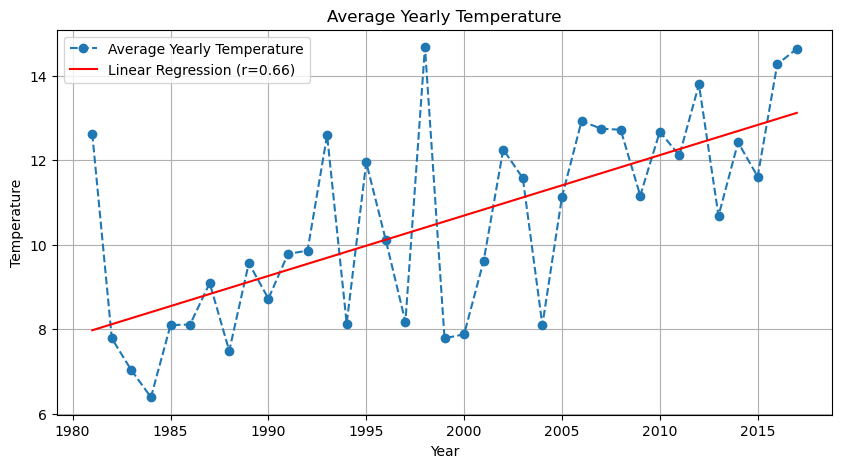

In [8]:
# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

# Group the data by year and calculate the mean temperature for each year 
yearly_temp = df_cleaned_BeaufortSea_Temp_data.groupby('year')['temp'].mean()

# Plotting the results
plt.figure(figsize=(10, 5))  # You can adjust the size as needed
plt.plot(yearly_temp.index, yearly_temp.values, marker='o', linestyle='--', label='Average Yearly Temperature')

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(yearly_temp.index.astype(float), yearly_temp.values)

# Calculate the values of the regression line
regression_line = slope * yearly_temp.index.astype(float) + intercept

# Plot the linear regression line
plt.plot(yearly_temp.index, regression_line, color='red', label=f'Linear Regression (r={r_value:.2f})')

# Adding title and labels
plt.title('Average Yearly Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.grid(True)
plt.legend()

# Displaying the plot
plt.show()


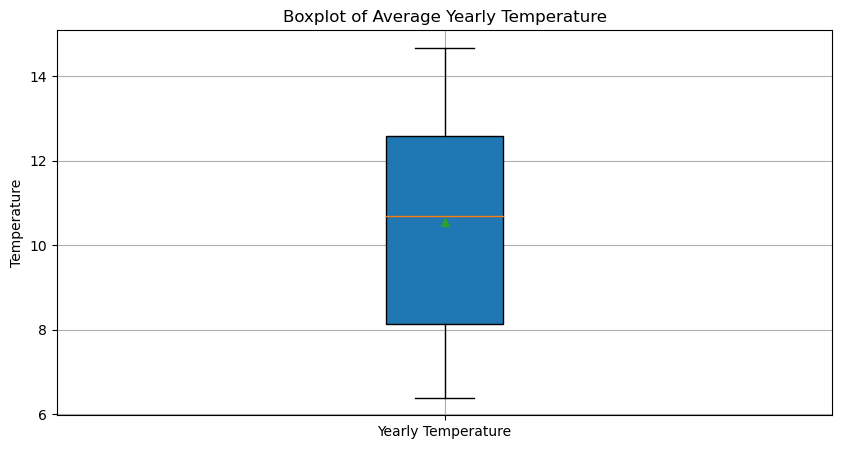

In [9]:
#Using a boxplot to interpret the average yearly temperature
# Group the data by year and calculate the mean temperature for each year
yearly_temp = df_cleaned_BeaufortSea_Temp_data.groupby('year')['temp'].mean()

# Plotting the boxplot
plt.figure(figsize=(10, 5))
plt.boxplot(yearly_temp, vert=True, patch_artist=True, showmeans=True, showfliers=True)

# Adding title and labels
plt.title('Boxplot of Average Yearly Temperature')
plt.ylabel('Temperature')
plt.xticks([1], ['Yearly Temperature'])  

# Displaying the plot
plt.grid(True)
plt.show()


In [24]:
#Statistical Summary: Maximum Temperature 

stats_summary = df_cleaned_BeaufortSea_Temp_data['temp_max'].describe()
mean = df_cleaned_BeaufortSea_Temp_data['temp_max'].mean()
median = df_cleaned_BeaufortSea_Temp_data['temp_max'].median()
mode = df_cleaned_BeaufortSea_Temp_data['temp_max'].mode()[0]  

# show statistical data
print(f"Mean: {mean}\nMedian: {median}\nMode: {mode}")
print(stats_summary)

Mean: 10.884695624290856
Median: 12.09
Mode: 32.67
count    324336.000000
mean         10.884696
std          19.905630
min         -36.580000
25%          -7.400000
50%          12.090000
75%          31.420000
max          45.900000
Name: temp_max, dtype: float64


In [29]:
# import dependencies

import pandas as pd
from scipy.stats import pearsonr

# Calculate the correlation coefficient and p-value of maximum temp
correlation_coefficient, p_value = pearsonr(df_cleaned_BeaufortSea_Temp_data['year'], df_cleaned_BeaufortSea_Temp_data['temp_max'])

# show correlation and P-value
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")


Correlation Coefficient: 0.0776000131430836
P-value: 0.0


In [28]:
#Statistical Summary: Temperature 
stats_summary = df_cleaned_BeaufortSea_Temp_data['temp'].describe()
mean = df_cleaned_BeaufortSea_Temp_data['temp'].mean()
median = df_cleaned_BeaufortSea_Temp_data['temp'].median()
mode = df_cleaned_BeaufortSea_Temp_data['temp'].mode()[0]  

# show Statistical data
print(f"Mean: {mean}\nMedian: {median}\nMode: {mode}")
print(stats_summary)

Mean: 10.546625690641807
Median: 11.66
Mode: 32.59
count    324336.000000
mean         10.546626
std          19.985959
min         -36.740000
25%          -7.830000
50%          11.660000
75%          31.260000
max          44.920000
Name: temp, dtype: float64


In [30]:
# import dependencies
import pandas as pd
from scipy.stats import pearsonr

# Calculate the correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(df_cleaned_BeaufortSea_Temp_data['year'], df_cleaned_BeaufortSea_Temp_data['temp'])

# show correlation and coefficient
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")


Correlation Coefficient: 0.07644228702895967
P-value: 0.0
